# AUPRC sklearn troubleshooting

In [1]:

import pandas as pd
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from maxatac.utilities.benchmarking_tools import calculate_R2_pearson_spearman, ChromosomeAUPRC
import seaborn as sns
import matplotlib.pyplot as plt

## Import the precision recall curve as a data frame

This section will import the 

In [2]:
df = pd.read_table("/Users/caz3so/scratch/20210815_maxATAC_round_robin/average_AUPR/ARID3A_test_in_GM12878_ENCODE_v1_chr1_200_max_chr1_200bp_PRC.tsv")

In [3]:
df

,Precision,Recall,Threshold,AUPRC,Total_GoldStandard_Bins
0,0.003530,1.000000,0.000000,0.088256,4012
1,0.079968,0.150050,0.000000,0.088256,4012
2,0.321486,0.049601,0.333333,0.088256,4012
3,1.000000,0.000249,0.666667,0.088256,4012
4,1.000000,0.000000,1.000000,0.088256,4012


In [4]:
AUPRC = metrics.auc(y=df["Precision"][:-1], x=df["Recall"][:-1])

In [5]:
df["Precision"][:-1]

0    0.003530
1    0.079968
2    0.321486
3    1.000000
Name: Precision, dtype: float64

In [6]:
AUPRC

0.08825624571707993

ERROR:root:Import Predictions Array
ERROR:root:Import Gold Standard Array
ERROR:root:Calculate precision-recall curve for chr1
ERROR:root:Making DataFrame from results
ERROR:root:Calculate AUPRc for chr1
ERROR:root:Write results for chr1


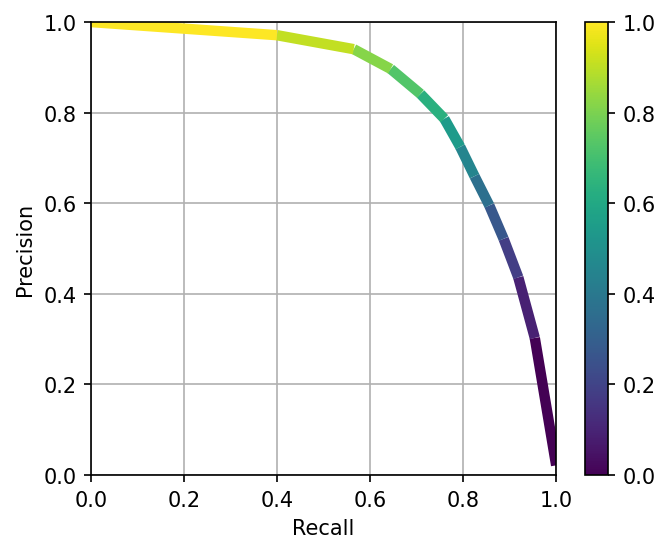

In [3]:
AUPRC_obj = ChromosomeAUPRC("/Users/caz3so/scratch/20210818_maxATAC_AUPRC_troubleshoot_sklearn/CTCF_test_in_GM12878_ENCODE_v1_chr1.bw",
                        "/Users/caz3so/scratch/20210818_maxATAC_AUPRC_troubleshoot_sklearn/GM12878__CTCF.bw",
                        "/Users/caz3so/scratch/maxATAC/data/genome_inf/hg38/hg38_maxatac_blacklist.bw",
                        "chr1",
                        1000,
                        "max",
                        "test_file.tsv",
                        9)

In [14]:
AUPRC_obj.bin_count

248956

In [25]:
AUPRC_obj.thresholds[:]

array([0.        , 0.09090909, 0.18181819, 0.27272728, 0.36363637,
       0.45454547, 0.54545456, 0.63636363, 0.72727275, 0.81818181,
       0.90909094, 1.        ])

In [24]:
AUPRC_obj.precision[:]

array([0.02144142, 0.30275409, 0.43643985, 0.52159749, 0.59520753,
       0.65987847, 0.72461596, 0.78665533, 0.84133561, 0.89660097,
       0.94021182, 0.97107232, 1.        ])

In [22]:
AUPRC_obj.recall[:]

array([1.        , 0.95404185, 0.91854739, 0.88695117, 0.85617563,
       0.82437423, 0.79359869, 0.75954042, 0.70824785, 0.64402954,
       0.56462864, 0.39946656, 0.        ])

In [26]:
AUPRC_obj.PR_CURVE_DF

,Precision,Recall,Threshold,AUPRC
0,0.021441,1.000000,0.000000,0.448199
1,0.302754,0.954042,0.000000,0.448199
2,0.436440,0.918547,0.090909,0.448199
3,0.521597,0.886951,0.181818,0.448199
4,0.595208,0.856176,0.272727,0.448199
5,0.659878,0.824374,0.363636,0.448199
6,0.724616,0.793599,0.454545,0.448199
7,0.786655,0.759540,0.545455,0.448199
8,0.841336,0.708248,0.636364,0.448199
9,0.896601,0.644030,0.727273,0.448199


In [4]:
PR_CURVE_DF = pd.DataFrame(
            {'Precision': AUPRC_obj.precision[:-1], 'Recall': AUPRC_obj.recall[:-1], "Threshold": AUPRC_obj.thresholds})


In [5]:
PR_CURVE_DF

,Precision,Recall,Threshold
0,0.021441,1.000000,0.000000
1,0.302754,0.954042,0.090909
2,0.436440,0.918547,0.181818
3,0.521597,0.886951,0.272727
4,0.595208,0.856176,0.363636
5,0.659878,0.824374,0.454545
6,0.724616,0.793599,0.545455
7,0.786655,0.759540,0.636364
8,0.841336,0.708248,0.727273
9,0.896601,0.644030,0.818182


(0.0, 1.0)

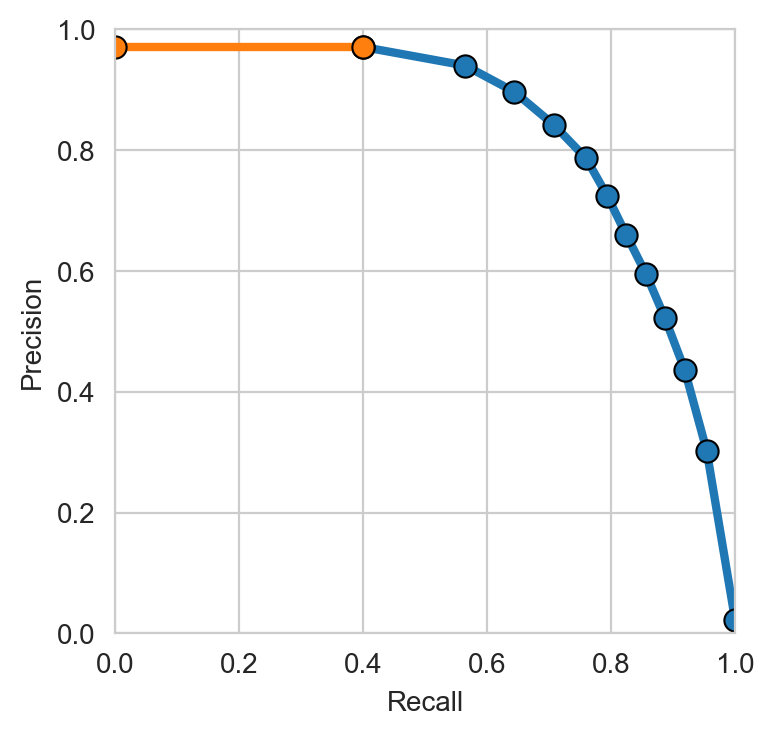

In [16]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.lineplot(data=PR_CURVE_DF, x="Recall", y="Precision", lw=3, ms=8,  marker="o", mec="k")
sns.lineplot(x=[0, PR_CURVE_DF["Recall"][11]], y=[PR_CURVE_DF["Precision"][11], PR_CURVE_DF["Precision"][11]], lw=3, ms=8,  marker="o", mec="k")

#sns.lineplot(data=PR_CURVE_DF[0:2], x="Recall", y="Precision", lw=3, ms=8,  marker="o", mec="k")
plt.ylim(0,1)
plt.xlim(0,1)